total_loss
dino_local_crops_loss
dino_global_crops_loss
koleo_loss


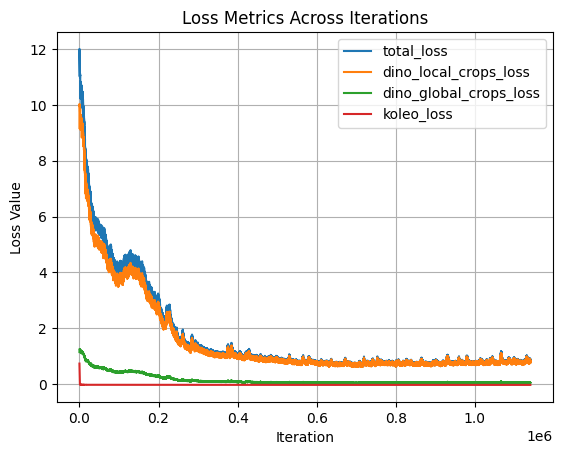

iter_time


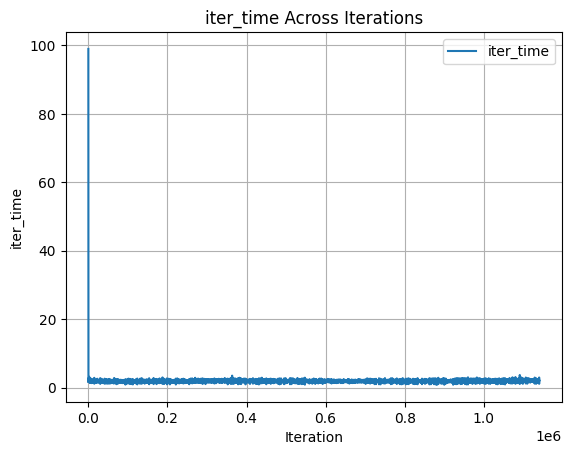

data_time


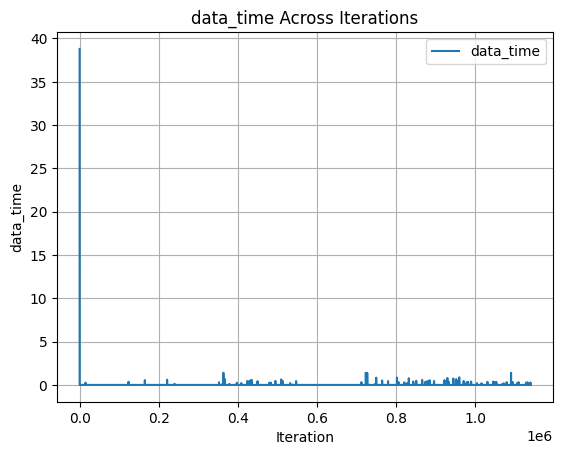

lr


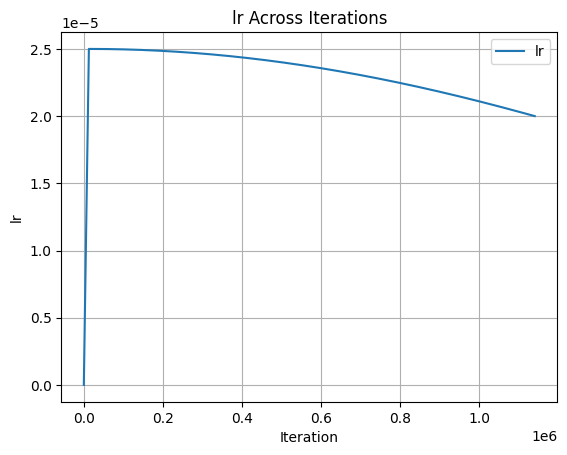

wd


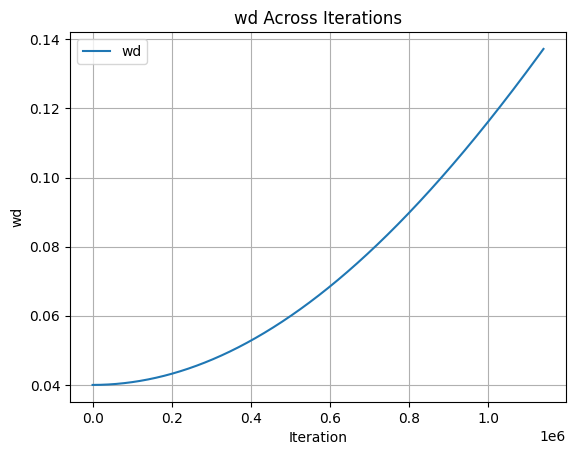

mom


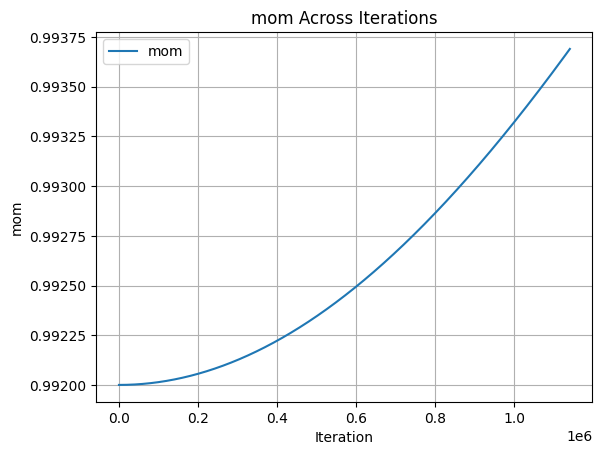

last_layer_lr


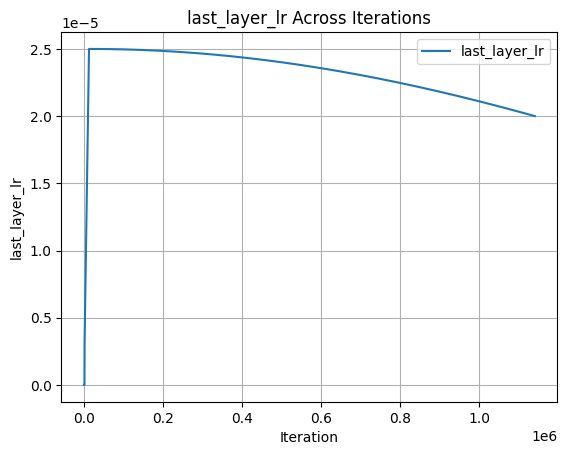

current_batch_size


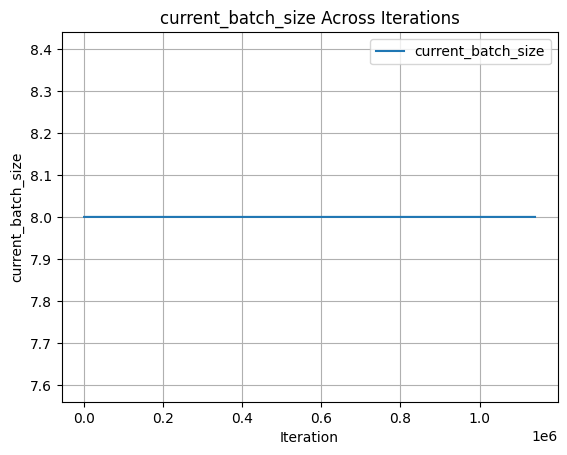

In [5]:
import matplotlib.pyplot as plt
import json

# Function to parse log data from a file
def parse_log_file(file_path, max_iterations=None):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            try:
                record = json.loads(line.strip())
                if max_iterations is not None and record["iteration"] > max_iterations:
                    break
                data.append(record)
            except json.JSONDecodeError:
                print(f"Skipping invalid line: {line}")
    return data

# Function to classify metrics
def classify_metrics(data):
    if not data:
        return [], []
    example_record = data[0]
    losses = [key for key in example_record if "loss" in key.lower()]
    others = [key for key in example_record if key not in losses and isinstance(example_record[key], (int, float)) and key != "iteration"]
    return losses, others

# Function to plot metrics
def plot_metrics(data, metrics, title, ylabel, max_iterations):
    iterations = [d["iteration"] for d in data]
    for metric in metrics:
        values = [d[metric] for d in data]
        plt.plot(iterations, values, label=metric)
        print(metric)

    # Customize plot
    plt.xlabel("Iteration")
    plt.ylabel(ylabel)
    plt.title(f"{title}") # (Up to {max_iterations})
    plt.legend()
    plt.grid(True)
    plt.show()

# File path to log.txt
log_file = "/rsrch1/ip/msalehjahromi/codes/dinov2-torchrun-dataloader6/output_dir/448_192_B1and2_B8/training_metrics.json"
log_file = "/rsrch1/ip/msalehjahromi/codes/dinov2-torchrun-dataloader6/output_dir/448_192_all23M_p16_win1150_B8_noif/training_metrics.json"

# Specify the maximum iterations to plot
max_iterations = 1200000

# Parse data and classify metrics
data = parse_log_file(log_file, max_iterations=max_iterations)
loss_metrics, other_metrics = classify_metrics(data)

# Plot losses
plot_metrics(data, loss_metrics, title="Loss Metrics Across Iterations", ylabel="Loss Value", max_iterations=max_iterations)

# Plot each other metric separately
for metric in other_metrics:
    plot_metrics(data, [metric], title=f"{metric} Across Iterations", ylabel=metric, max_iterations=max_iterations)


In [3]:
16000*8*12

1536000